In [1]:
#Importa Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Dataset 
df_covid = pd.read_csv('http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz', compression='gzip')
df_covid

dados-curso-completo.csv  ...                  hashtags
0            2020-03-23 18:51:14  ...                        []
1            2020-03-18 03:18:14  ...                        []
2            2020-03-29 12:09:27  ...                        []
3            2020-04-01 21:11:07  ...                        []
4            2020-03-19 17:49:40  ...                        []
...                          ...  ...                       ...
1658821      2020-05-12 13:02:34  ...                        []
1658822      2020-03-19 18:16:30  ...           ['CORONAVIRUS']
1658823      2020-04-07 18:14:45  ...  ['BolsonaroTemRazaoSim']
1658824      2020-06-02 16:04:51  ...                        []
1658825                      NaN  ...                       NaN

[1658826 rows x 13 columns]

#Visão Geral dos Dados

##Sem processamento

###Relatório

In [3]:
#Instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 55.4MB 76.9MB/s
     |████████████████████████████████| 71kB 1.9MB/s 
     |████████████████████████████████| 71kB 5.1MB/s 
     |████████████████████████████████| 604kB 14.0MB/s 
     |████████████████████████████████| 3.1MB 17.0MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 296kB 34.9MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=afd65b8aa8922ed3c26512d437398aa27be14917b890a91060cfcd6151d96bd6
  Stored in directory: /tmp/pip-ephem-wheel-cache-7vx03zt_/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=14b274cb19d95f0f18aa9e183d2681b377d985d8e8268bb0207abf5cf4a66662
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291

In [4]:
#Importando o ProfileReport
from pandas_profiling import ProfileReport

In [5]:
#Executando o profile

#Desabilita os métodos considerados mais custosos
#profile = ProfileReport(df_covid, title = 'Relatório - Pandas Profiling', html = {'style': {'full_width': True}}, minimal = True)

profile = ProfileReport(df_covid, title='Relatório - Pandas Profiling', html={'style': {'full_width': True}}, plot={'histogram': {'bins': 10}})
profile

Output hidden; open in https://colab.research.google.com to view.

In [6]:
#Fazendo download do relatório (disponível na aba à esquerda, ícone pasta)
profile.to_file(output_file = "dataframe_report_original.html")

In [7]:
#Visualização mais enxuta do relatório
profile.to_widgets()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/profile_report.py:397: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


###Análises

O dataset:

*   Número de Variáveis - 13;
  *   9 Categóricas;
  *   4 Numéricas.
*   Número de Observações - 1658826.

De acordo com o relatório acima, **37.3%** do dataset correspondem à **dados faltantes**. As variáveis que possuem mais dados faltantes são:

*   Latitude - 99.5%;
*   Longitude - 99.5%
*   Lugar - 95.5%;
*   País - 95.5%;
*   Sigla - 95.5%.

Dois dos usuários que mais possuem comentários no dataset são canais de notícia de Portugal, inclusive uma delas aparece duas vezes por terem nome de usuários diferentes.

*   Agência Lusa - 1404;
*   tvi24 Últimas (1181) e tvi24 (1178) - 2359.

A coluna retweet tem valores que variam de 0 (1314424	ou 79.2%) a 1139763 (1 ou < 0.1%), fazendo com que os dados tenham uma assimetria positiva ou à direita, ou seja, maior que 0 (75.73862462). Esse comportamento pode ser melhor observado no gráfico abaixo.















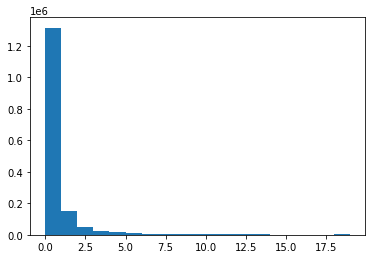

In [8]:
plt.hist(df_covid['retweet'], bins=range(0, 20));

Os dados da coluna seguidores apresentam o mesmo comportamento descrito anteriormente. O usuário com o maior número de seguidores é o Donald Trump.

In [9]:
df_covid.loc[df_covid.seguidores == 84241250]

dados-curso-completo.csv          usuario  ... longitude hashtags
788393      2020-05-23 23:08:17  Donald J. Trump  ...       NaN       []

[1 rows x 13 columns]

A maioria dos textos estão no idioma português (95.7%), porém o relatório mostra que apenas 4.3% dos tweets são do Brasil e de Portugal. Outros países que tem como um de seus idiomas o português, correspondem a menos de 1% do dataset. Esse desencontro entre as informações se deve provavelmente aos dados faltantes na coluna País.

##Com processamento

In [10]:
#Selecionando somente texto com perguntas
df_processado = df_covid[df_covid['texto'].str.contains('\?', na = False)]
pd.set_option('display.max_info_columns', 5000)
df_processado.reset_index(inplace = True, drop = True)
df_processado

dados-curso-completo.csv  ...                              hashtags
0           2020-03-23 18:51:14  ...                                    []
1           2020-04-01 21:11:07  ...                                    []
2           2020-06-25 11:09:19  ...                                    []
3           2020-04-06 15:44:36  ...  ['COVID19', 'floripa', 'isolamento']
4           2020-03-30 00:43:36  ...                                    []
...                         ...  ...                                   ...
172496      2020-03-24 23:50:14  ...                                    []
172497      2020-03-26 21:43:24  ...                                    []
172498      2020-05-25 22:53:13  ...                                    []
172499      2020-03-13 17:26:18  ...                                    []
172500      2020-05-12 13:02:34  ...                                    []

[172501 rows x 13 columns]

In [38]:
#df_processado[df_processado['usuario'] == 'Lucas Santos']

dados-curso-completo.csv  ...                                           hashtags
23479       2020-04-02 20:00:09  ...  ['direitodotrabalho', 'justiçadotrabalho', 'ad...
39361       2020-04-02 19:57:43  ...  ['direitodotrabalho', 'justiçadotrabalho', 'ad...
48963       2020-04-02 19:51:47  ...  ['direitodotrabalho', 'justiçadotrabalho', 'ad...
75783       2020-04-02 19:54:24  ...  ['direitodotrabalho', 'justiçadotrabalho', 'ad...
82157       2020-04-02 19:56:15  ...  ['direitodotrabalho', 'justiçadotrabalho', 'ad...
84840       2020-04-08 16:29:59  ...                                                 []
93364       2020-04-02 19:44:34  ...  ['direitodotrabalho', 'justiçadotrabalho', 'ad...
100621      2020-04-08 20:04:22  ...                                                 []
118805      2020-04-08 16:31:29  ...                                                 []
124871      2020-06-07 20:02:48  ...                                                 []
127929      2020-03-31 21:59:52  ...                                                 []
157609      2020-04-02 20:06:35  ...  ['direitodotrabalho', 'justiçadotrabalho', 'ad...

[12 rows x 13 columns]

In [11]:
df_processado.iloc[4626,3]

'@ptbrasil "Como não pensamos nisso... ? Cloroquina made in USA https://t.co/zOwCRM4TC6'

In [12]:
#Separando as perguntas e colocando-as com os seus dados em listas
datas = []
usuarios = []
textos = []
retweets = []
num_seg = []
lugares = []
paises = []

import re
for index, row in df_processado.iterrows():
#for x in df_processado['texto']:
  if row['texto'].find(" ?"):
    row['texto'] = row['texto'].replace(" ?","?")
  m = re.split('(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)(\s|[A-Z].*)', row['texto'])
  for i in m:
    if i.count("?") > 0:
      datas.append(row['dados-curso-completo.csv'])
      usuarios.append(row['usuario'])
      textos.append(i)
      retweets.append(row['retweet'])
      num_seg.append(row['seguidores'])
      lugares.append(row['lugar'])
      paises.append(row['pais'])

In [13]:
#Criando dataframe a partir de um dicionário de listas
dados = {'dados-curso-completo.csv': datas, 'usuario': usuarios, 'texto': textos, 'retweet': retweets, 'seguidores': num_seg, 'lugar': lugares, 'pais': paises}
df_duvidasDB = pd.DataFrame(dados)
df_duvidasDB

dados-curso-completo.csv                   usuario  ... lugar  pais
0           2020-03-23 18:51:14                  Gaboardi  ...   NaN   NaN
1           2020-04-01 21:11:07                         🚩  ...   NaN   NaN
2           2020-06-25 11:09:19            Andreia Peraro  ...   NaN   NaN
3           2020-04-06 15:44:36         Diorgenes Pandini  ...   NaN   NaN
4           2020-03-30 00:43:36             Valnei do Val  ...   NaN   NaN
...                         ...                       ...  ...   ...   ...
196586      2020-05-25 22:53:13  O que houve com a couve?  ...   NaN   NaN
196587      2020-05-25 22:53:13  O que houve com a couve?  ...   NaN   NaN
196588      2020-05-25 22:53:13  O que houve com a couve?  ...   NaN   NaN
196589      2020-03-13 17:26:18                     broca  ...   NaN   NaN
196590      2020-05-12 13:02:34                 Renato 🇧🇷  ...   NaN   NaN

[196591 rows x 7 columns]

In [14]:
#Transformando a coluna com Data e Hora para datetime
df_duvidasDB['dados-curso-completo.csv'] = pd.to_datetime(df_duvidasDB['dados-curso-completo.csv'])

In [15]:
# Insert weekday and hour of checkin time
import datetime
from datetime import datetime as dt

weekday_name = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']

df_duvidasDB['dia_da_semana'] = df_duvidasDB['dados-curso-completo.csv']
df_duvidasDB['dia_da_semana'] = df_duvidasDB['dia_da_semana'].apply(
    lambda x: weekday_name[dt.weekday(x)]
)  # Datetime -> weekday string

In [16]:
df_duvidasDB

dados-curso-completo.csv                   usuario  ... pais  dia_da_semana
0           2020-03-23 18:51:14                  Gaboardi  ...  NaN        Segunda
1           2020-04-01 21:11:07                         🚩  ...  NaN         Quarta
2           2020-06-25 11:09:19            Andreia Peraro  ...  NaN         Quinta
3           2020-04-06 15:44:36         Diorgenes Pandini  ...  NaN        Segunda
4           2020-03-30 00:43:36             Valnei do Val  ...  NaN        Segunda
...                         ...                       ...  ...  ...            ...
196586      2020-05-25 22:53:13  O que houve com a couve?  ...  NaN        Segunda
196587      2020-05-25 22:53:13  O que houve com a couve?  ...  NaN        Segunda
196588      2020-05-25 22:53:13  O que houve com a couve?  ...  NaN        Segunda
196589      2020-03-13 17:26:18                     broca  ...  NaN          Sexta
196590      2020-05-12 13:02:34                 Renato 🇧🇷  ...  NaN          Terca

[196591 rows x 8 columns]

In [17]:
#Armazenando data e hora separadamente
# Coluna 'Data'
df_duvidasDB['data'] = df_duvidasDB['dados-curso-completo.csv'].dt.strftime('%d-%m-%Y')
# Coluna 'Hora'
df_duvidasDB['hora'] = df_duvidasDB['dados-curso-completo.csv'].dt.strftime('%H')

In [18]:
#Removendo coluna com data e hora juntos
df_duvidasDB.drop('dados-curso-completo.csv', axis=1)

usuario  ... hora
0                       Gaboardi  ...   18
1                              🚩  ...   21
2                 Andreia Peraro  ...   11
3              Diorgenes Pandini  ...   15
4                  Valnei do Val  ...   00
...                          ...  ...  ...
196586  O que houve com a couve?  ...   22
196587  O que houve com a couve?  ...   22
196588  O que houve com a couve?  ...   22
196589                     broca  ...   17
196590                 Renato 🇧🇷  ...   13

[196591 rows x 9 columns]

In [19]:
#Reorganizando as colunas do dataframe
df_duvidasDB = df_duvidasDB[['data', 'dia_da_semana', 'hora', 'usuario', 'texto', 'retweet', 'seguidores', 'lugar', 'pais']]

In [37]:
df_duvidasDB[df_duvidasDB['usuario'] == 'Lucas Santos']

data dia_da_semana hora  ... medicamentos organizacoes  pessoas
26762   02-04-2020        Quinta   20  ...          NaN          NaN      NaN
44896   02-04-2020        Quinta   19  ...          NaN          NaN      NaN
55799   02-04-2020        Quinta   19  ...          NaN          NaN      NaN
86374   02-04-2020        Quinta   19  ...          NaN          NaN      NaN
93663   02-04-2020        Quinta   19  ...          NaN          NaN      NaN
96713   08-04-2020        Quarta   16  ...          sim          NaN      NaN
106429  02-04-2020        Quinta   19  ...          NaN          NaN      NaN
114729  08-04-2020        Quarta   20  ...          sim          NaN      NaN
135413  08-04-2020        Quarta   16  ...          sim          NaN      NaN
142351  07-06-2020       Domingo   20  ...          NaN          NaN      NaN
142352  07-06-2020       Domingo   20  ...          NaN          NaN      NaN
145792  31-03-2020         Terca   21  ...          NaN          NaN      NaN
179571  02-04-2020        Quinta   20  ...          NaN          NaN      NaN

[13 rows x 13 columns]

In [21]:
#Executando o profile

#Desabilita os métodos considerados mais custosos
#profile = ProfileReport(df_covid, title = 'Relatório - Pandas Profiling', html = {'style': {'full_width': True}}, minimal = True)

profile = ProfileReport(df_duvidasDB, title='Relatório - Pandas Profiling', html={'style': {'full_width': True}}, plot={'histogram': {'bins': 10}})
profile

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
#Fazendo download do relatório (disponível na aba à esquerda, ícone pasta)
profile.to_file(output_file = "dataframe_report_processado.html")

In [23]:
#Visualização mais enxuta do relatório
profile.to_widgets()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/profile_report.py:397: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


In [24]:
#caminho_do_arquivo = '\csv_uea\sentenca_tweet.csv'
#texto_bruto.to_csv(caminho_do_arquivo, index=False)
#print(caminho_do_arquivo)

#Temas Discutidos

###Categorização

In [25]:
list_doencas = ['corona','virus','covid','Sars-Cov-2']
list_medicamentos = ['Azitromicina','AAS','Buscopan','Cloroquina','Hidroxicloroquina','Remdersivir','Dexametasona','Lopinavir','Ivermectina','Nitazoxanida','Plasma','chá','Heparina','limão','ozônio','Corticoide','Ritonavir']
list_organizacoes = ['OMS','Globo','Record','STF', 'Congresso','Senado','Camara','igreja','SUS','hospita','FDA','butatan','fvs','Oxford','MS','Ministério da Saúde','SBPT','AMIB']
list_pessoas = ['Bolsonaro','Trump','Lula','Mandetta','Mandeta','Draúzio','Wilson Lima','Witzel','Dória','Crivela','Arthur Neto','Pazuello','Boris','Johnson','Macron','Osmar Terra','Nelson Teich']

In [26]:
for i in range(len(list_doencas)):
  df_duvidasDB.loc[df_duvidasDB.texto.str.contains(list_doencas[i], flags=re.I, regex=True),'doencas'] = 'sim'

for i in range(len(list_medicamentos)):
  df_duvidasDB.loc[df_duvidasDB.texto.str.contains(list_medicamentos[i], flags=re.I, regex=True),'medicamentos'] = 'sim'

for i in range(len(list_organizacoes)):
  df_duvidasDB.loc[df_duvidasDB.texto.str.contains(list_organizacoes[i], flags=re.I, regex=True),'organizacoes'] = 'sim'

for i in range(len(list_pessoas)):
  df_duvidasDB.loc[df_duvidasDB.texto.str.contains(list_pessoas[i], flags=re.I, regex=True),'pessoas'] = 'sim'

In [27]:
df_duvidasDB

data dia_da_semana hora  ... medicamentos organizacoes  pessoas
0       23-03-2020       Segunda   18  ...          NaN          NaN      sim
1       01-04-2020        Quarta   21  ...          NaN          NaN      NaN
2       25-06-2020        Quinta   11  ...          NaN          NaN      NaN
3       06-04-2020       Segunda   15  ...          NaN          NaN      NaN
4       30-03-2020       Segunda   00  ...          NaN          NaN      NaN
...            ...           ...  ...  ...          ...          ...      ...
196586  25-05-2020       Segunda   22  ...          NaN          NaN      NaN
196587  25-05-2020       Segunda   22  ...          NaN          NaN      NaN
196588  25-05-2020       Segunda   22  ...          NaN          NaN      NaN
196589  13-03-2020         Sexta   17  ...          NaN          sim      NaN
196590  12-05-2020         Terca   13  ...          sim          NaN      sim

[196591 rows x 13 columns]

In [28]:
df_duvidasDB['dia_da_semana'].value_counts()

Terca      39416
Quarta     34264
Quinta     32583
Segunda    28650
Sexta      23407
Domingo    19341
Sabado     18930
Name: dia_da_semana, dtype: int64

In [29]:
#Quantidade de perguntas por dia da semana, nessa ordem
quantidade = df_duvidasDB['dia_da_semana'].value_counts().reset_index()
quantidade.columns = ['dia_da_semana', 'quantidade']

weekday_name = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']
mapping = {day: i for i, day in enumerate(weekday_name)}
key = quantidade['dia_da_semana'].map(mapping)

quantidade = quantidade.iloc[key.argsort()].set_index('dia_da_semana')
quantidade

quantidade
dia_da_semana            
Segunda             28650
Terca               39416
Quarta              34264
Quinta              32583
Sexta               23407
Sabado              18930
Domingo             19341

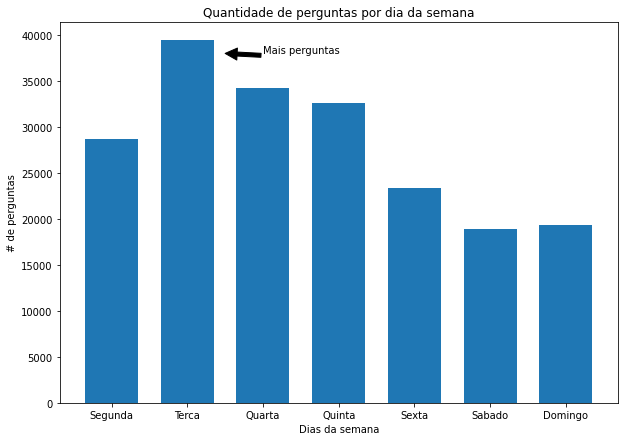

In [30]:
#Gráfico da quantidade de perguntas por dia da semana, tem a ver com o dia de liberar os numeros do covid?
fig = plt.figure(figsize=(10, 7), facecolor='w')
ax  = fig.add_subplot(1,1,1)

ax.bar(x=weekday_name, 
       height=[28650,39416,34264,32583,23407,18930,19341],
       width=0.7)

plt.title('Quantidade de perguntas por dia da semana')
plt.xlabel('Dias da semana')
plt.ylabel('# de perguntas')
plt.annotate('Mais perguntas', xy=(1.5, 38000), xytext=(2, 38000), arrowprops=dict(facecolor='black'))

plt.show()

In [31]:
df_duvidasDB['hora'].value_counts()

23    27870
22    18224
21    16464
20    15972
19    14408
18    12534
17    11810
16    11198
15     9486
14     7917
13     7464
00     6045
12     5914
01     5661
02     4915
11     4796
03     4107
10     2936
04     2512
05     1753
09     1629
06     1050
08      999
07      927
Name: hora, dtype: int64

In [32]:
#Quantidade de perguntas por hora, nessa ordem
quantidade = df_duvidasDB['hora'].value_counts().reset_index()
quantidade.columns = ['hora', 'quantidade']
horario = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
#horario = ['0h','1h','2h','3h','4h','5h','6h','7h','8h','9h','10h','11h','12h','13h','14h','15h','16h','17h','18h','19h','20h','21h','22h','23h']
mapping = {hour: i for i, hour in enumerate(horario)}
key = quantidade['hora'].map(mapping)

quantidade = quantidade.iloc[key.argsort()].set_index('hora')
quantidade

quantidade
hora            
00          6045
01          5661
02          4915
03          4107
04          2512
05          1753
06          1050
07           927
08           999
09          1629
10          2936
11          4796
12          5914
13          7464
14          7917
15          9486
16         11198
17         11810
18         12534
19         14408
20         15972
21         16464
22         18224
23         27870

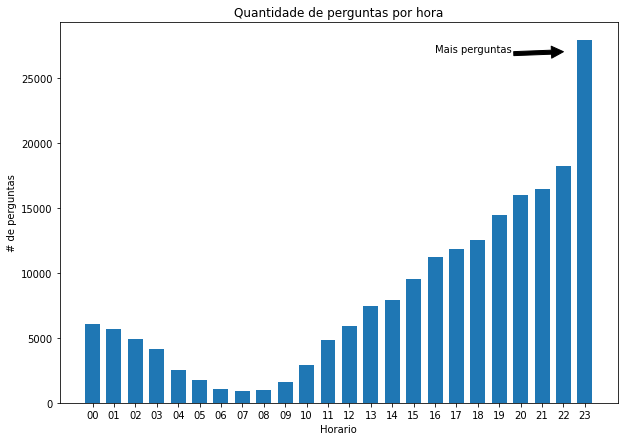

In [33]:
#Quantidade de perguntas por hora
fig = plt.figure(figsize=(10, 7), facecolor='w')
ax  = fig.add_subplot(1,1,1)

ax.bar(x=horario, 
       height=[6045,5661,4915,4107,2512,1753,1050,927,999,1629,2936,4796,5914,7464,7917,9486,11198,11810,12534,14408,15972,16464,18224,27870],
       width=0.7)

plt.title('Quantidade de perguntas por hora')
plt.xlabel('Horario')
plt.ylabel('# de perguntas')
plt.annotate('Mais perguntas', xy=(22, 27000), xytext=(16, 27000), arrowprops=dict(facecolor='black'))

plt.show()

In [34]:
#plt.bar(range(len(counts)), counts)
#plt.yticks(np.arange(0, 35000, step=5000))

In [35]:
perg_doencas = df_duvidasDB['dia_da_semana'][df_duvidasDB['doencas'] == 'sim']
perg_medicamentos = df_duvidasDB['dia_da_semana'][df_duvidasDB['medicamentos'] == 'sim']
perg_organizacoes = df_duvidasDB['dia_da_semana'][df_duvidasDB['organizacoes'] == 'sim']
perg_pessoas = df_duvidasDB['dia_da_semana'][df_duvidasDB['pessoas'] == 'sim']
perg_doencas

1          Quarta
3         Segunda
5           Terca
6         Segunda
9          Quinta
           ...   
196577     Quinta
196578      Terca
196581      Sexta
196588    Segunda
196590      Terca
Name: dia_da_semana, Length: 53129, dtype: object

AttributeError: ignored

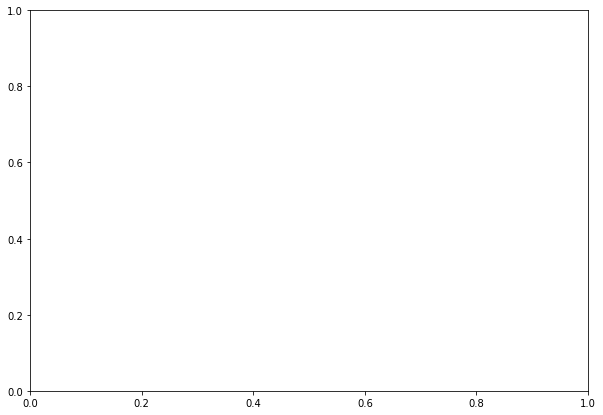

In [36]:
fig = plt.figure(figsize=(10, 7), facecolor='w')
ax  = fig.add_subplot(1,1,1)

ax.bar(x=[1,2,3,4], 
       height=[perg_doencas.coun,perg_medicamentos,perg_organizacoes,perg_pessoas],
       width=0.7)

#ax.hist()
plt.legend()
plt.title('Quantidade de perguntas por hora')
plt.xlabel('Horario')
plt.ylabel('# de perguntas')
plt.annotate('Mais perguntas', xy=(22, 27000), xytext=(16, 27000), arrowprops=dict(facecolor='black'))

plt.show()

In [ ]:
#vai ter que colocar em ordem também
perg_doencas = df_duvidasDB['dia_da_semana'][df_duvidasDB['doencas'] == 'sim']
perg_medicamentos = df_duvidasDB['dia_da_semana'][df_duvidasDB['medicamentos'] == 'sim']
perg_organizacoes = df_duvidasDB['dia_da_semana'][df_duvidasDB['organizacoes'] == 'sim']
perg_pessoas = df_duvidasDB['dia_da_semana'][df_duvidasDB['pessoas'] == 'sim']

fig = plt.figure(figsize=(10, 7), facecolor='w')
ax  = fig.add_subplot(1,1,1)

ax.hist([
         perg_doencas,
         perg_medicamentos,
         perg_organizacoes,
         perg_pessoas
    ],
     bins = 8,
     rwidth=0.8,
     stacked = True,
     label = ['doencas', 'medicamentos', 'organizacoes', 'pessoas'])

plt.legend()
plt.title('Perguntas mencionando palavras de cada tema')
#plt.xlabel('')
plt.ylabel('# de perguntas')

# coloca o nome dos meses como label do eixo x
weekday_name = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']
plt.xticks([x + 0.5 for x in range(len(perg_doencas))], weekday_name)

#plt.xticks(range(7))
plt.xlim(0, 7)
#plt.annotate('More Trump tweets', xy=(1, 9600), xytext=(2, 9600), arrowprops=dict(facecolor='black'))

plt.show()

In [ ]:
perg_doencas.value_counts().sort_values()

In [ ]:
fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))
ax.bar(x, tl["clinton"], width, color='g')
ax.bar(x + width, tl["sanders"], width, color='b')
ax.bar(x + (width * 2), tl["trump"], width, color='r')

ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()

In [ ]:
df_duvidasDB['doencas'][df_duvidasDB['doencas'] == 'sim'].count()

In [ ]:
doenca = df_duvidasDB.doencas.count()
medicamento = df_duvidasDB.medicamentos.count()
organizacao = df_duvidasDB.organizacoes.count()
pessoa = df_duvidasDB.pessoas.count()

teste = []

valores = df_duvidasDB.groupby('dia_da_semana')['texto'].count()

teste.append(valores[0])
teste.append(valores[1])
teste.append(valores[2])
teste.append(valores[3])
teste.append(valores[4])
teste.append(valores[5])
teste.append(valores[6])

teste

In [ ]:
df_duvidasDB.plot(kind = 'line', x = 'dia_da_semana', y = '')
#df_duvidasDB.plot()
#df_duvidasDB.plot()
#df_duvidasDB.plot()

plt.show()

In [ ]:
df_duvidasDB.pivot_table(index='dia_da_semana',columns='hora',values=teste).fillna(0)
pt = pt.reindex_axis(dia_da_semana)
sns.heatmap(pt, annot=True)

#Visão Temporal

In [ ]:
dcdcdcd

In [ ]:
df_duvidasDB['doencas'].astype('category', categories=names, ordered=True)

In [ ]:
df_duvidasDB.groupby('dia_da_semana')['texto'].count().plot()

In [ ]:
df_duvidasDB.groupby('dia_da_semana')['doencas'].value_counts()

In [ ]:
teste = [datetime.time(df_duvidasDB['hora']()).strftime("%I %p") for i in range(24)]

In [ ]:
valores = df_duvidasDB.groupby('dia_da_semana')['texto'].count()
type(valores)

In [ ]:
x_axis = [datetime.time(i).strftime("%I %p") for i in range(24)]  # 24hr time list
x0 = x_axis.index(hour_of_day) / 24
x1 = x0 + 1 / 24

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=7, figsize=(30,5))
plt.subplots_adjust(wspace=0.05)  #Remove some whitespace between subplots

df_duvidasDB['dia_da_semana'].apply(lambda x: dt.weekday(x))

for idx, gp in df_duvidasDB.groupby(df_duvidasDB.data.dt.weekday('data')):
    ax[idx].set_title(gp.Date.dt.day_name().iloc[0])  #Set title to the weekday

    (gp.groupby(gp.Date.dt.hour).size().rename_axis('Tweet Hour').to_frame('')
        .reindex(np.arange(0,24,1)).fillna(0)
        .plot(kind='bar', ax=ax[idx], rot=0, ec='k', legend=False))

    # Ticks and labels on leftmost only
    if idx == 0:
        _ = ax[idx].set_ylabel('Counts', fontsize=11)

    _ = ax[idx].tick_params(axis='both', which='major', labelsize=7,
                            labelleft=(idx == 0), left=(idx == 0))

# Consistent bounds between subplots. 
lb, ub = list(zip(*[axis.get_ylim() for axis in ax]))
for axis in ax:
    axis.set_ylim(min(lb), max(ub)) 

plt.show()

#Visão Geográfica